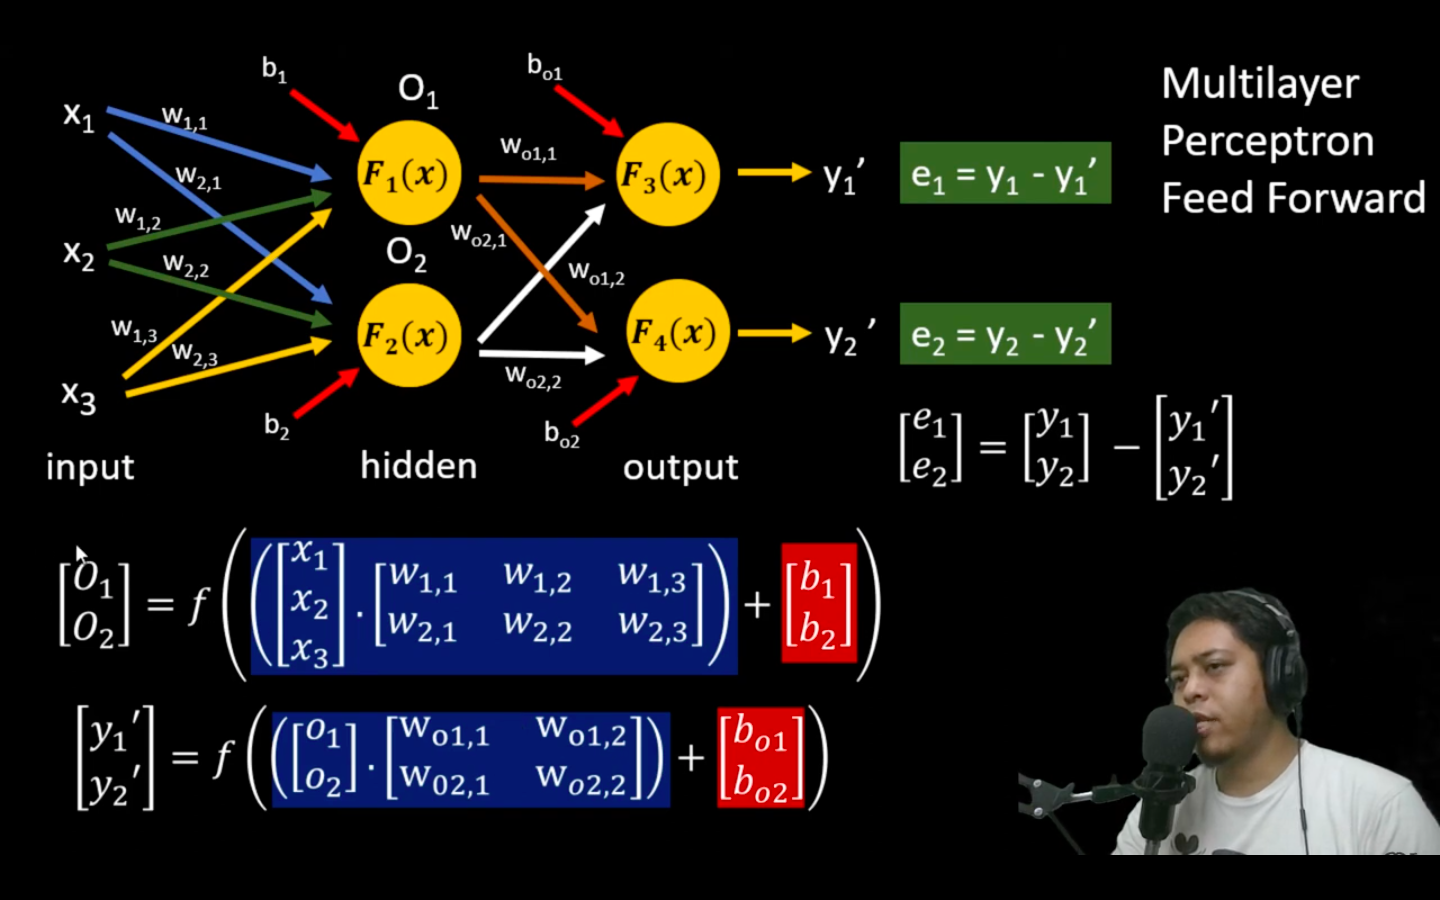

In [ ]:
# table logika XOR 2 input
"""

x1    x2    y
1     1     1
1     0     0
0     1     0
0     0     0

"""

'\n\nx1    x2    y\n1     1     1\n1     0     0\n0     1     0\n0     0     0\n\n'

In [ ]:
# machine learning

import keras
import numpy as np
import matplotlib.pyplot as plt

# model
model = keras.Sequential([
    # layer 1 (hidden)
    keras.layers.Dense(units=8, input_shape=[2], activation=keras.activations.tanh),
    # layer 2 (output)
    keras.layers.Dense(units=1, input_shape=[8], activation=keras.activations.sigmoid)
])

# compile
opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.losses = []
    self.accuracy = []

  def on_batch_end(self, batch, logs={}):
    self.losses.append(logs.get('loss'))
    self.accuracy.append(logs.get('binary_accuracy'))

In [ ]:
# set data
xs = np.array([[1,1], [1,0], [0,1], [0,0]], dtype=int)
ys = np.array([0,1,1,0], dtype=int)

In [ ]:
# tampilkan arsitektur awal
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 24        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# training
history = LossHistory()
model.fit(xs, ys, epochs=100, callbacks=[history])

Epoch 1/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5593 - binary_accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5579 - binary_accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5564 - binary_accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5550 - binary_accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5535 - binary_accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5520 - binary_accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.5505 - binary_accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5490 - binary_accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.5475 - binary_accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 10m

In [ ]:
# make a prediction
xnew = model.predict(xs)  #<----
# show the inputs and predicted outputs
for i in range(len(xs)):
    print("X=%s, Predicted=%s" % (xs[i], xnew[i].round()))


1/1 [==============================] - 0s 23ms/step
X=[1 1], Predicted=[0.]
X=[1 0], Predicted=[1.]
X=[0 1], Predicted=[1.]
X=[0 0], Predicted=[0.]


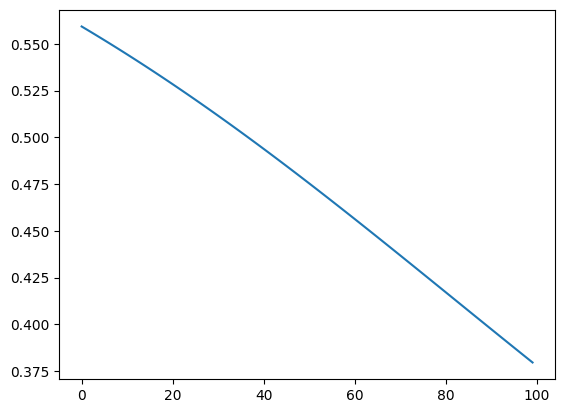

In [ ]:
loss_values = history.losses

plot1 = plt.figure(1)
plt.plot(loss_values)
plt.show()

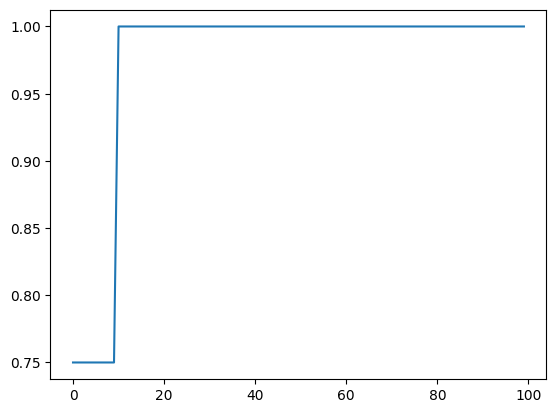

In [ ]:
accuracy_values = history.accuracy

plot2 = plt.figure(2)
plt.plot(accuracy_values)
plt.show()